In [20]:
## import necessary libraries
import numpy as np
import pandas as pd

## read the raw data file
df = pd.read_csv('../raw_data/diabetes_012_health_indicators_BRFSS2015.csv')

# drop duplicates
df.drop_duplicates(inplace=True)

# convert data types
df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']].astype(int)

In [21]:
#slice the dataframe for feature and label
df_copy = df.copy(deep=True)
X, y = df_copy.iloc[:,1:], df_copy.iloc[:,0]

# #get dummies
# def get_dummies(X):

#     # Identify discrete columns with more than 2 categories
#     discrete_columns = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype != 'float64']

#     # Create dummy variables for these columns
#     df_with_dummies = pd.get_dummies(X, columns=discrete_columns, drop_first=True)

#     return df_with_dummies
# X = get_dummies(X)
# X

array([[<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>],
       [<AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Veggies'}>],
       [<AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplo

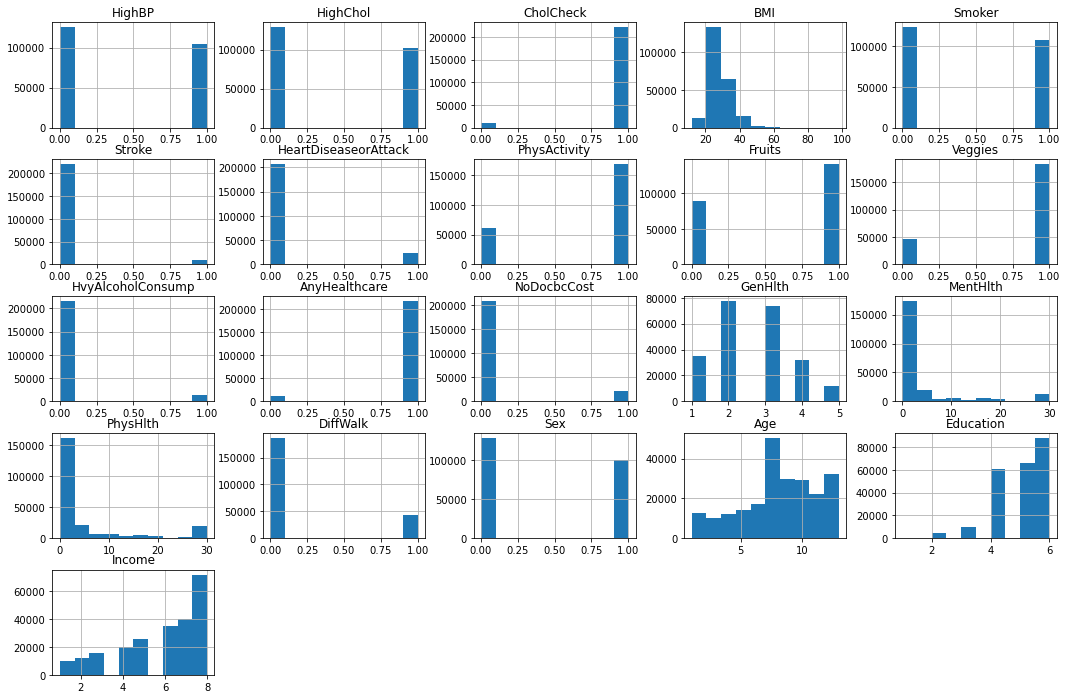

In [22]:
X.hist(figsize=(18,12))

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

array([[<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>],
       [<AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'GenHlth_2'}>,
        <AxesSubplot:title={'center':'GenHlth_3'}>,
        <Axe

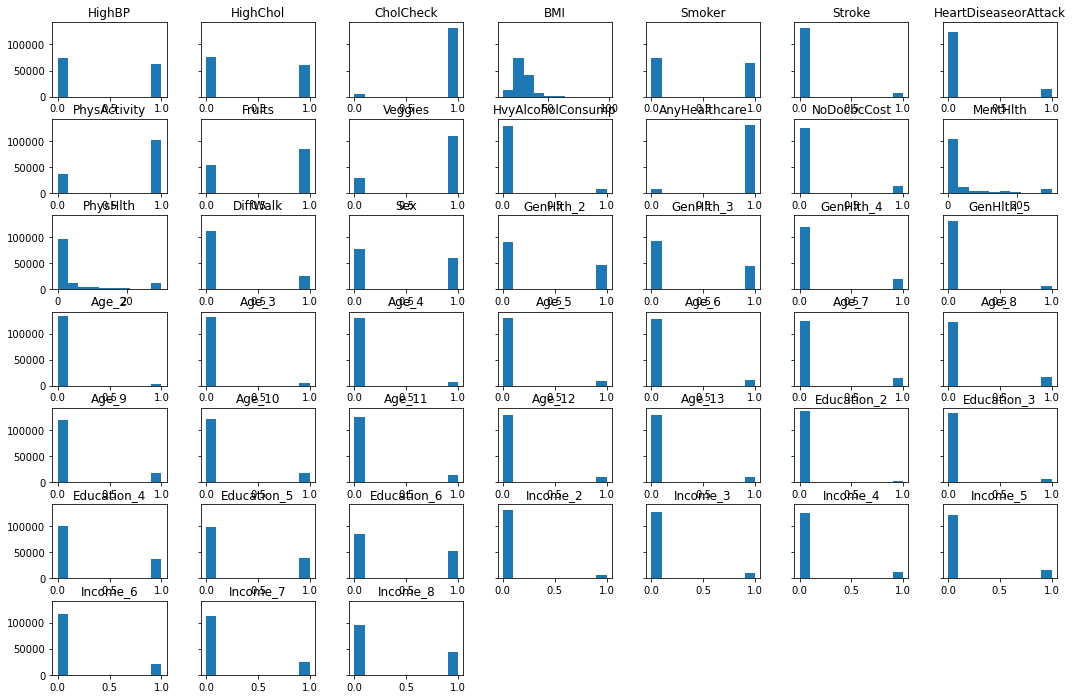

In [18]:
X_train.hist(figsize=(18,12), grid=False, sharey=True)

In [5]:
## This is the baseline dummy classifier which classifies all as the majority class

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_dummy_prediction = dummy_majority.predict(X_test)

## calculate metrics
accuracy = accuracy_score(y_test, y_dummy_prediction)
precision = precision_score(y_test, y_dummy_prediction, average='macro')
recall = recall_score(y_test, y_dummy_prediction, average='macro')
f1 = f1_score(y_test, y_dummy_prediction, average='macro')
print('Unique predicted labels: ', (np.unique(y_dummy_prediction)))
print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

Unique predicted labels:  [0]
accuracy : 0.8288055008540686  precision : 0.2762685002846895 
 recall : 0.3333333333333333  f1 : 0.3021299970452513


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_train)
X_scaled_test = scalar.fit_transform(X_test)

In [7]:
# Moving forward with l2 logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Training the logistic regression model
clf = LogisticRegression(penalty='l2', solver = 'newton-cg', class_weight='balanced', max_iter = 1000)

clf.fit(X_scaled, y_train)

# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6206303787277099  precision : 0.44497679790056166 
 recall : 0.5137457838597453  f1 : 0.4210787314810232


In [8]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = clf.predict(X_scaled_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9452    0.6323    0.7578     76178
           1     0.0321    0.3120    0.0582      1824
           2     0.3576    0.5969    0.4473     13911

    accuracy                         0.6206     91913
   macro avg     0.4450    0.5137    0.4211     91913
weighted avg     0.8382    0.6206    0.6969     91913



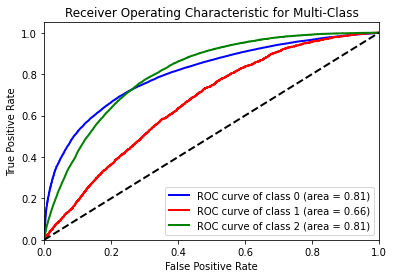

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.neighbors import KNeighborsClassifier

# Setting up the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)

knn.fit(X_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

In [ ]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

In [41]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

# Setting up the KNN classifier
svc = LinearSVC()

svc.fit(X_scaled, y_train)

# Making predictions
y_pred = svc.predict(X_scaled_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8342236680339016  precision : 0.47580726920263405 
 recall : 0.3630505476689391  f1 : 0.36032432048021407


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = svc.predict(X_scaled_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8409    0.9881    0.9085     76178
           1     0.0000    0.0000    0.0000      1824
           2     0.5866    0.1011    0.1724     13911

    accuracy                         0.8342     91913
   macro avg     0.4758    0.3631    0.3603     91913
weighted avg     0.7857    0.8342    0.7791     91913



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = knn.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [26]:
## we can see that both logistic regression and KNN perform very poorly, lets try more models

## Decision trees
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(class_weight = 'balanced')
tree_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.7400585336133082  precision : 0.38795436368810293 
 recall : 0.39263890780295413  f1 : 0.38980767743190164


In [27]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8587    0.8365    0.8474     76178
           1     0.0277    0.0373    0.0318      1824
           2     0.2775    0.3041    0.2902     13911

    accuracy                         0.7401     91913
   macro avg     0.3880    0.3926    0.3898     91913
weighted avg     0.7542    0.7401    0.7469     91913



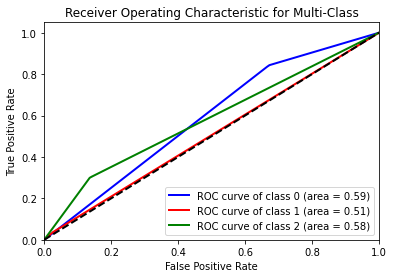

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = tree_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [30]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6856919043008062  precision : 0.4150824984684313 
 recall : 0.46973873690335055  f1 : 0.4093965359532808


In [31]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9154    0.7004    0.7936     76178
           1     0.0362    0.0159    0.0221      1824
           2     0.2937    0.6929    0.4125     13911

    accuracy                         0.6857     91913
   macro avg     0.4151    0.4697    0.4094     91913
weighted avg     0.8038    0.6857    0.7206     91913



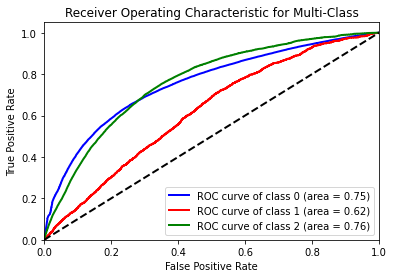

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = NB_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [33]:
## random forest prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, class_weight = 'balanced')
rf_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.825585064136738  precision : 0.43470258339371354 
 recall : 0.37097536002161574  f1 : 0.37368934678032045


In [34]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8448    0.9700    0.9031     76178
           1     0.0000    0.0000    0.0000      1824
           2     0.4593    0.1429    0.2180     13911

    accuracy                         0.8256     91913
   macro avg     0.4347    0.3710    0.3737     91913
weighted avg     0.7697    0.8256    0.7815     91913



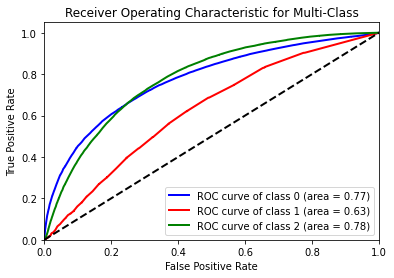

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = rf_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [36]:
## gradient boosing decision trees (GBDT)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_clf = GradientBoostingClassifier(n_estimators=300)
GBDT_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8360188439067379  precision : 0.46742952966280865 
 recall : 0.3886469338780578  f1 : 0.39794023347873436


In [37]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8520    0.9736    0.9087     76178
           1     0.0000    0.0000    0.0000      1824
           2     0.5503    0.1924    0.2851     13911

    accuracy                         0.8360     91913
   macro avg     0.4674    0.3886    0.3979     91913
weighted avg     0.7894    0.8360    0.7963     91913



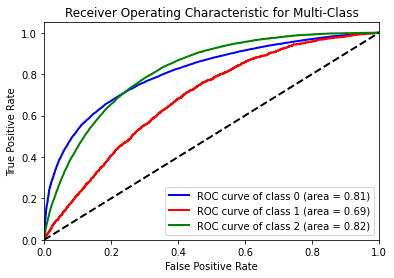

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_scaled, y_train)

# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.8356380490246211  precision : 0.46529169192354747 
 recall : 0.3909616369617985  f1 : 0.4007462396639669


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.metrics import classification_report
# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8531    0.9715    0.9084     76178
           1     0.0000    0.0000    0.0000      1824
           2     0.5428    0.2014    0.2938     13911

    accuracy                         0.8356     91913
   macro avg     0.4653    0.3910    0.4007     91913
weighted avg     0.7892    0.8356    0.7974     91913



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


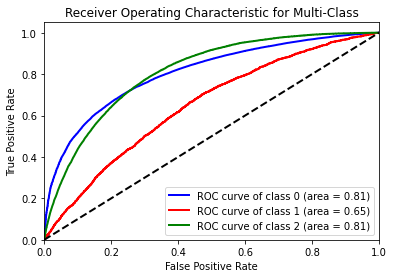

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = ada_clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # First hidden layer
        self.fc1 = nn.Linear(45, 64)
        # Second hidden layer
        self.fc2 = nn.Linear(64, 32)
        # Third hidden layer
        self.fc3 = nn.Linear(32, 16)
        # Output layer
        self.fc4 = nn.Linear(16, 3)

    def forward(self, x):
        # Apply ReLU activation function after each hidden layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # Apply softmax to the output layer
        x = F.softmax(self.fc4(x), dim=1)
        return x

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your features and labels respectively
# Convert your data to PyTorch tensors if they are not already

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.int64)

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
batch_size = 183824  # You can adjust this according to your needs
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Assuming X and y are your features and labels respectively
# Convert your data to PyTorch tensors if they are not already

X_tensor_test = torch.tensor(X_scaled_test, dtype=torch.float32)
y_tensor_test = torch.tensor(y_test.to_numpy(), dtype=torch.int64)

# Create a TensorDataset
dataset = TensorDataset(X_tensor_test, y_tensor_test)

# Create a DataLoader
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Create the neural network
model = NeuralNetwork()

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []
    all_labels = []
    with torch.no_grad():  # No need to track gradients for evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    recall = recall_score(all_labels, all_predictions, average='macro')
    return recall

# Example training loop
for epoch in range(500):  # num_epochs is the number of times you go through the entire dataset
    # all_predictions = []
    # all_labels = []
    for batch in train_loader:  # data_loader is your PyTorch DataLoader with training data
        inputs, labels = batch
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    recall = evaluate_model(model, test_loader)
    print(f'Epoch {epoch+1}/500, Loss: {loss.item():.4f}, Macro Recall: {recall:.4f}')


    #     _, predicted = torch.max(outputs.data, 1)
    #     all_predictions.extend(predicted.cpu().numpy())
    #     all_labels.extend(labels.cpu().numpy())

    # # Calculate recall
    # recall = recall_score(all_labels, all_predictions, average='macro')
    # print(f'Epoch [{epoch+1}/{500}], Loss: {loss.item():.4f}, Recall: {recall:.4f}')

In [5]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_train)
X_scaled_test = scalar.fit_transform(X_test)
X_scaled.shape

(137868, 45)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

param_grid = ['l2', 'none']

for value in param_grid:
    clf = LogisticRegression(penalty=value, class_weight='balanced', solver='newton-cg', max_iter=1000)
    clf.fit(X_scaled, y_train)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is penalty = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is penalty = l2
accuracy : 0.6206303787277099  precision : 0.44497679790056166 
 recall : 0.5137457838597453  f1 : 0.4210787314810232
current parameter is penalty = none
accuracy : 0.6206521384352595  precision : 0.4450157296641115 
 recall : 0.5139329081142806  f1 : 0.4211271345961078


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

param_grid = [50, 150, 200, 300]

for value in param_grid:
    clf = AdaBoostClassifier(n_estimators=value)
    clf.fit(X_scaled, y_train)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


current parameter is n_estimator = 50
accuracy : 0.8349743779443605  precision : 0.4631498766932142 
 recall : 0.3906359598452394  f1 : 0.40022491978016356


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


current parameter is n_estimator = 150
accuracy : 0.8355401303406482  precision : 0.4652530968723956 
 recall : 0.3905109466527419  f1 : 0.4001912725863685


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


current parameter is n_estimator = 200
accuracy : 0.8355727699019725  precision : 0.4654196138962652 
 recall : 0.3903477985764508  f1 : 0.399996604813257
current parameter is n_estimator = 300
accuracy : 0.8356380490246211  precision : 0.46529169192354747 
 recall : 0.3909616369617985  f1 : 0.4007462396639669


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
clf = LogisticRegression(penalty='none', class_weight='balanced', solver='newton-cg', max_iter=1000)
clf.fit(X_scaled, y_train)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[48172   511  2280]
 [13836   570  3327]
 [14170   743  8304]]


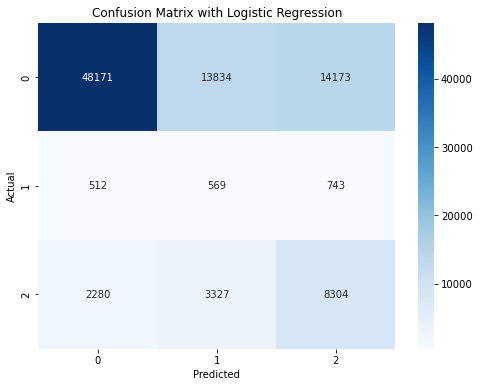

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
y_pred = clf.predict(X_scaled_test)  # Ensure you are using the test set for predictions
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for a nicer display
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Logistic Regression')
plt.show()

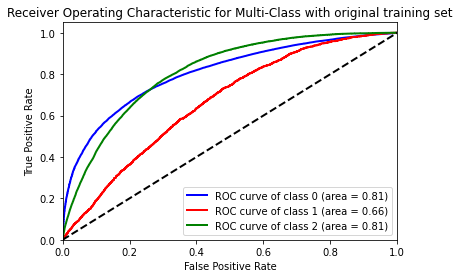

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class with original training set')
plt.legend(loc="lower right")
plt.show()

In [45]:
X_train.columns.tolist()

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'GenHlth_2',
 'GenHlth_3',
 'GenHlth_4',
 'GenHlth_5',
 'Age_2',
 'Age_3',
 'Age_4',
 'Age_5',
 'Age_6',
 'Age_7',
 'Age_8',
 'Age_9',
 'Age_10',
 'Age_11',
 'Age_12',
 'Age_13',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'Education_6',
 'Income_2',
 'Income_3',
 'Income_4',
 'Income_5',
 'Income_6',
 'Income_7',
 'Income_8']

Feature significance in Logistic Regression model:


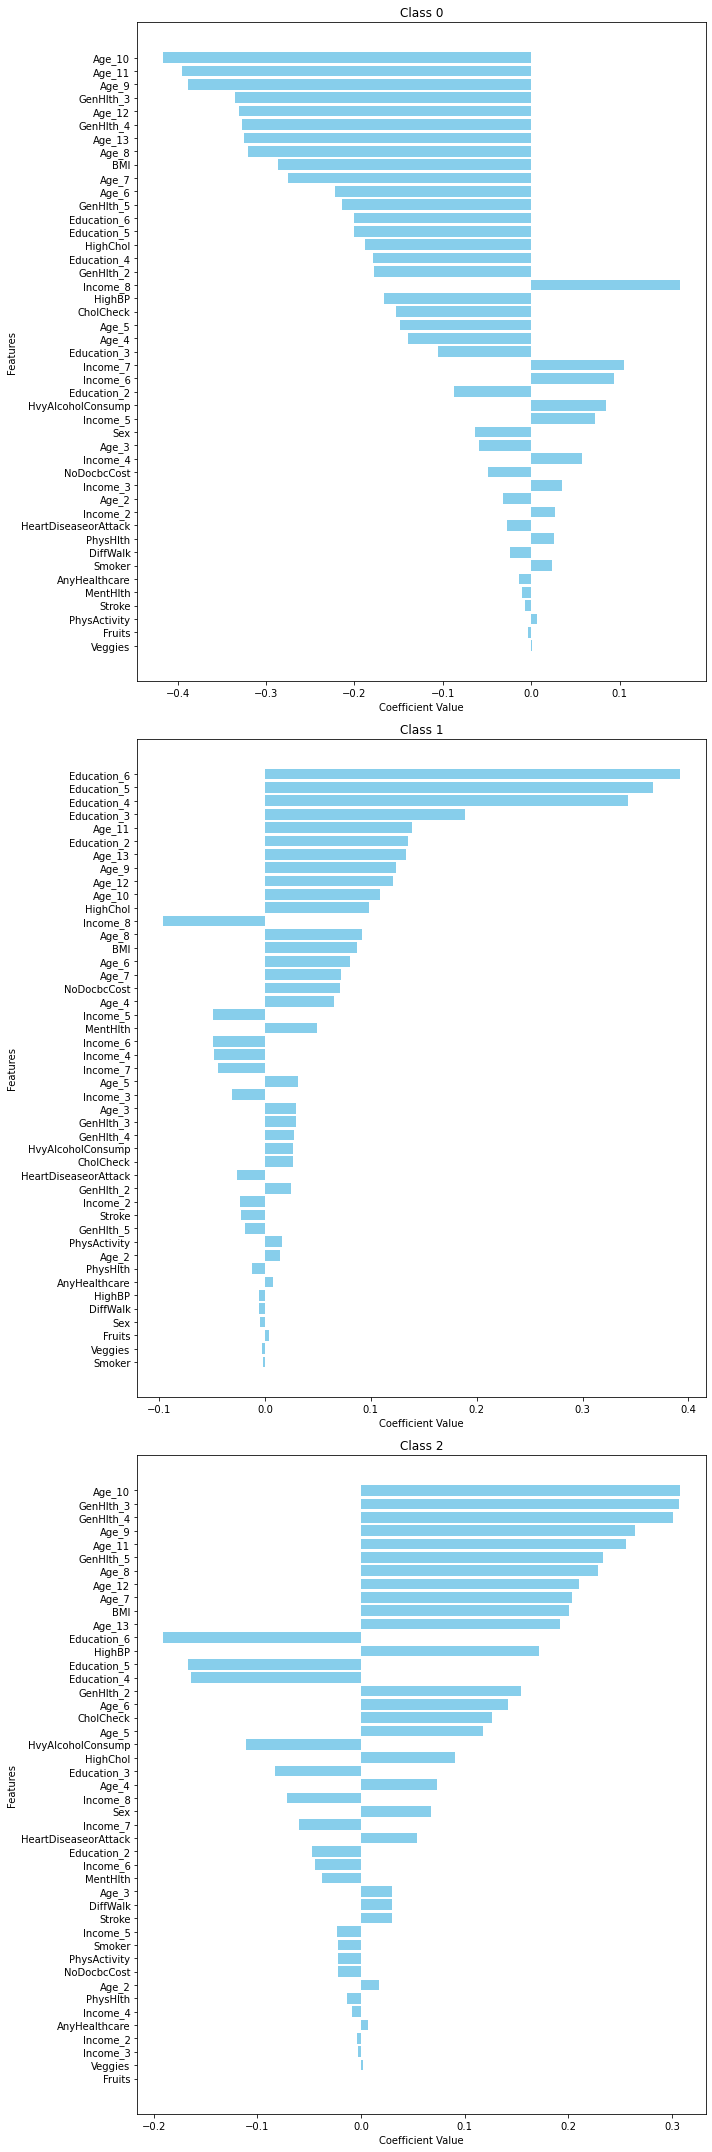

In [73]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assuming you've already fitted your logistic regression model:
# clf = LogisticRegression()
# clf.fit(X_scaled, y_train)

# Get the coefficients from the model
coefficients = clf.coef_

# If you have feature names, you can pair them with the coefficients
feature_names = X_train.columns.tolist() # replace with your actual feature names

# Assuming you have class names
class_names = ['0', '1', '2']  # replace with your actual class names

# Print out the feature significance for each class
print("Feature significance in Logistic Regression model:")

# Visualizing sorted feature importance for each class
num_features = len(feature_names)
num_classes = len(class_names)

fig, axes = plt.subplots(num_classes, 1, figsize=(10,30))

for i in range(num_classes):
    # Sort features by their importance for class i
    idxs = np.argsort(np.abs(coefficients[i]))
    sorted_features = [feature_names[idx] for idx in idxs]
    sorted_coefficients = coefficients[i][idxs]

    # Plot
    axes[i].barh(sorted_features, sorted_coefficients, color='skyblue')
    axes[i].set_title(f'Class {class_names[i]}')
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_ylabel('Features')

plt.tight_layout()
plt.show()